# **Ï†ú17Ïû• ÏàúÌôò Í∏∞Î∞ò ÏãúÌÄÄÏä§ Î™®Îç∏Ïùò SCFI ÏòàÏ∏°**

Í∑∏ÎûòÌîÑÏóê ÌïúÍ∏ÄÏùÑ Ï∂úÎ†•ÌïòÎäî Í≤ΩÏö∞ ÌïúÍ∏ÄÌè∞Ìä∏Î•º ÏÇ¨Ï†ÑÏóê ÏÑ§ÏπòÌïúÎã§.

Îã§ÏùåÏùò ÌïúÍ∏ÄÌè∞Ìä∏ÏÑ§Ïπò.ipynbÏùò ÌïúÍ∏ÄÌè∞Ìä∏Î•º ÏÑ§ÏπòÌïòÎäî ÏΩîÎìúÎ•º Î≥µÏÇ¨ÌïúÎã§.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from scipy.stats import shapiro, gaussian_kde
from scipy.signal import find_peaks
from google.colab import files
import os

# üìÅ 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏóÖÎ°úÎìú Î∞è ÏÑ§Ï†ï
print("üìå ÌïúÍ∏Ä Ìè∞Ìä∏(.ttf)Î•º ÏóÖÎ°úÎìúÌïòÏÑ∏Ïöî")
uploaded_fonts = files.upload()
font_path = list(uploaded_fonts.keys())[0]
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False



üìå ÌïúÍ∏Ä Ìè∞Ìä∏(.ttf)Î•º ÏóÖÎ°úÎìúÌïòÏÑ∏Ïöî


Saving NanumBarunGothic.ttf to NanumBarunGothic.ttf


# **Î≥µÌï© SCFI ÏòàÏ∏°Î™®Îç∏Ïùò Í∞úÎ∞úÏùÑ ÏöîÏ≤≠ÌïòÏûê**

# ÎèÑÌëú 17-8. Î≥µÌï© SCFI ÏóêÏ∏°Î™®Ìòï Í∞úÎ∞ú ChatGPT ÏöîÏ≤≠ ÎÇ¥Ïö©

Î≥µÌï© SCFIÎ•º Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú Í∞ñÎäî RNN, LSTM, GRU Î™®ÌòïÏùÑ Í∞úÎ∞úÌïúÎã§.
- SCFI_C: Î≥µÌï©SCFI, Ï¢ÖÏÜçÎ≥ÄÏàò
- ÏïÑÎûò Î≥ÄÏàòÎäî Î™®Îëê ÎèÖÎ¶ΩÎ≥ÄÏàò ÌõÑÎ≥¥Ïù¥Îã§.
  YYYYMM ÎÖÑÏõî, CH_EXP Ï§ëÍµ≠ÏàòÏ∂úÎüâ, FLEET_DEV Î™ÖÎ™©ÏÑ†Î≥µÎüâ, G_RELI ÏÑ†Î∞ïÏùò Í∏ÄÎ°úÎ≤å Ï†ïÏãúÏÑ±,
  ACTUAL_SHIP_CAPACITY Ïã§ÏÑ†Î≥µÎüâ, DEMAND_SUPPLY_RATIO ÏàòÏöîÍ≥µÍ∏âÎπÑÏú®, DEMAND_FORECAST ÏàòÏöîÏ†ÑÎßù, SUPPLY_FORECAST Í≥µÍ∏âÏ†ÑÎßù
- Í≥ÑÏ†àÏÑ±ÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌïòÏó¨ YYYMMÏóê ÎåÄÌï¥ 1ÏõîÏùÑ Ï†úÏô∏Ìïú 2ÏõîÎ∂ÄÌÑ∞ 12ÏõîÍπåÏßÄ Í∞ÅÍ∞ÅÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎì§ÏùÑ ÏÉùÏÑ±ÌïòÏó¨ Î™®Îç∏ÎßÅ
  1) data['Month'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m').dt.month
  2) month_one_hot = pd.get_dummies(data['Month'], prefix='Month').iloc[:, 1:]  # Ï≤´ Î≤àÏß∏ Ïó¥(1Ïõî) Ï†úÏô∏
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÎßàÏßÄÎßâ 2021ÎÖÑ 10ÏõîÎ∂ÄÌÑ∞ 2023ÎÖÑ 2ÏõîÍπåÏßÄÎäî ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨Ìï®
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Í∞Å Î™®ÌòïÏùÑ ÎßåÎì§Í≥†ÎÇòÏÑú, Í∑∏ Î™®ÌòïÏóê Í∏∞Î∞òÌïòÏó¨ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ≥† Î™®ÌòïÎ≥Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú RMSEÎ•º Í≥ÑÏÇ∞
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Í∞Å Î™®ÌòïÏùÑ ÎßåÎì§Í≥†ÎÇòÏÑú, Í∑∏ Î™®ÌòïÏóê Í∏∞Î∞òÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ≥† Î™®ÌòïÎ≥Ñ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú RMSEÎ•º Í≥ÑÏÇ∞
- Î™®ÌòïÎ≥Ñ ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú RMSE, ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú RMSEÏùÑ ÌÖåÏù¥Î∏î ÌòïÌÉúÎ°ú Ï∂úÎ†•ÌïúÎã§.
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Í∞Å Î™®ÌòïÏùÑ ÎßåÎì§Í≥†ÎÇòÏÑú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïã§Ï†Å, ÏòàÏ∏°Í∞íÏùÑ ÏÑ∏Í∞ú Î™®ÌòïÏùÑ ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î†§Ï§ò
  Îã®, Í∑∏ÎûòÌîÑÏóêÏÑú ÌõàÎ†®Ïù¥ÌÑ∞ ÏòàÏ∏°Í∞íÏùÄ ÌååÎûÄÏÉâ, ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°Í∞íÏùÄ Îπ®Í∞ÑÏÉâ, Ïã§Ï†ÅÏùÄ Í≤ÄÏùÄÏÉâÏúºÎ°ú Í∑∏Î†§Ï§ò(XÏ∂ïÏùÄ YYYYMM)
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Í∞Å Î™®ÌòïÏùÑ ÎßåÎì§Í≥†ÎÇòÏÑú, Í∑∏ Î™®ÌòïÏóê Í∏∞Î∞òÌïòÏó¨ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ≥† Î™®ÌòïÎ≥Ñ RMSEÎ•º Í≥ÑÏÇ∞
- ÏûÖÏ∂úÎ†• Îç∞Ïù¥ÌÑ∞Îäî "/content/sample_data/" Ìè¥ÎçîÏóê ÏúÑÏπòÌïúÎã§.
- Í∞Å Î™®ÌòïÏùò ÏàòÌñâÏãúÍ∞ÑÎèÑ Î≥ÑÎèÑÏùò ÌÖåÏù¥Î∏îÎ°ú ÎßåÎì§Ïñ¥Ï§ò.
- Î™®ÌòïÏù¥ ÏàòÌñâÌïòÎäî Í≥ºÏ†ïÏùÄ Ï∂úÎ†•ÌïòÏßÄ ÏïäÎèÑÎ°ù ÌïòÎã§.
- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Îäî ÏïÑÎûò ÏΩîÎìú ÏÇ¨Ïö©Ìï®
# Extract the month and create one-hot encoded columns
data['Month'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m').dt.month
month_one_hot = pd.get_dummies(data['Month'], prefix='Month').iloc[:, 1:]  
# Join the one-hot encoded columns with the original dataframe
data_with_months = data.join(month_one_hot)
# Prepare the data for modeling
X = data_with_months.drop(['YYYYMM', 'SCFI_C', 'Month'], axis=1)  # Independent variables
y = data_with_months['SCFI_C']  # Dependent variable

# **Ïù¥Ìïò ÏùÄÎãâÏπ≠ ÌôúÏÑ±Ìôî Ìï®Ïàò tanh ÏÇ¨Ïö©**


# (1Ï∞® Î™®Îç∏) ÌïôÏäµ Í≥ºÏ†ï Î∞è ÏßÑÌñâ Í≥ºÏ†ïÏù¥ ÌôîÎ©¥Ïóê Ï∂úÎ†•(Ïã§Ìñâ Í∞í Î≥ÄÎèô, ÌôîÎ©¥ Ï∂úÎ†• Í∞ÄÎèÖÏÑ± Ï†ÄÌïò)
- ÎèÑÌëú 17-9. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ï†Ñ 3Í∞ú Î™®Îç∏Ïùò 1Ï∞® ÏòàÏ∏° Í≤∞Í≥º ÎπÑÍµê(1Ï∞® Î™®Îç∏)




üîµ RNN Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - loss: 0.1709
Epoch 2/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0689  
Epoch 3/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0407  
Epoch 4/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.0291 
Epoch 5/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.0196 
Epoch 6/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0148 
Epoch 7/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.0097  
Epoch 8/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0091 
Epoch 9/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0065  
Epoch 10/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 18ms/step - loss: 0.0750
Epoch 2/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step - loss: 0.0389
Epoch 3/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step - loss: 0.0339 
Epoch 4/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0253
Epoch 5/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step - loss: 0.0293
Epoch 6/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.0332
Epoch 7/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step - loss: 0.0280
Epoch 8/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.0167
Epoch 9/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0174
Epoch 10/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 14ms/step - loss: 0.0472
Epoch 2/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - loss: 0.0319
Epoch 3/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0335 
Epoch 4/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0204 
Epoch 5/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0186 
Epoch 6/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0168 
Epoch 7/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0114 
Epoch 8/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0104 
Epoch 9/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0081 
Epoch 10/100
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 569ms/step

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 294ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 65ms/step

üìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê
                    RNN        LSTM          GRU
Train RMSE   244.634901  127.746522   139.831939
Test RMSE   1264.211484  970.189682  1112.368242


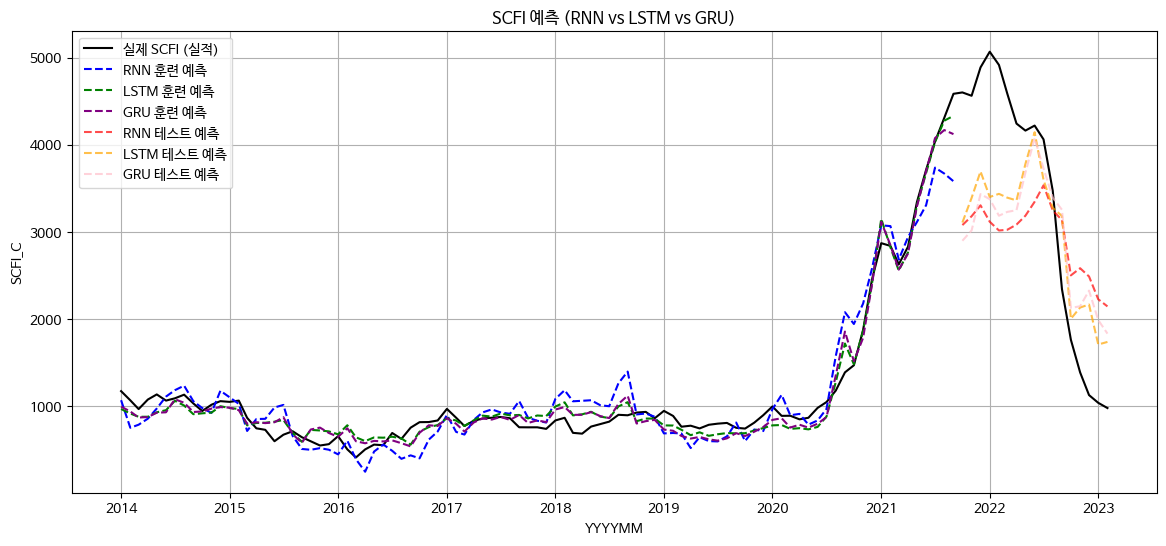

In [2]:
# ================================
#  üìå SCFI ÏòàÏ∏°: RNN vs LSTM vs GRU ÎπÑÍµê
# ================================

# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# -------------------------------
#  1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# -------------------------------
# üìå ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï (ColabÏóê ÏóÖÎ°úÎìúÌïú Í≤ΩÏö∞ ÏßÅÏ†ë ÏßÄÏ†ï)
file_path = "/content/sample_data/Ï†ÑÏ≤òÎ¶¨_SCFI.xlsx"

# ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_excel(file_path)

# YYYYMMÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y-%m')

# Ïõî(Month) Ïª¨Îüº ÏÉùÏÑ± Î∞è Ïõê-Ìï´ Ïù∏ÏΩîÎî©
df['Month'] = df['YYYYMM'].dt.month
month_one_hot = pd.get_dummies(df['Month'], prefix='Month').iloc[:, 1:]  # 1Ïõî Ï†úÏô∏

# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Ïª¨Îüº Ï∂îÍ∞Ä
df_with_months = df.join(month_one_hot)

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y) Î∂ÑÎ¶¨
X = df_with_months.drop(['YYYYMM', 'SCFI_C', 'Month'], axis=1)
y = df_with_months['SCFI_C']

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (2021ÎÖÑ 10Ïõî Ïù¥Ï†Ñ: ÌõàÎ†®, Ïù¥ÌõÑ: ÌÖåÏä§Ìä∏)
train_data = df[df['YYYYMM'] < '2021-10-01']
test_data = df[df['YYYYMM'] >= '2021-10-01']

X_train = X.iloc[:len(train_data)]
y_train = y.iloc[:len(train_data)]

X_test = X.iloc[len(train_data):]
y_test = y.iloc[len(train_data):]

# -------------------------------
#  2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (MinMax Scaling)
# -------------------------------
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
X_train_scaled = X_scaled[:len(train_data)]
X_test_scaled = X_scaled[len(train_data):]

y_train_scaled = y_scaled[:len(train_data)]
y_test_scaled = y_scaled[len(train_data):]

# RNN ÏûÖÎ†• ÌòïÌÉú Î≥ÄÌôò (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# -------------------------------
#  3Ô∏è‚É£ Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò Ï†ïÏùò
# -------------------------------
def build_and_train_model(model_type):
    """ RNN, LSTM, GRU Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† ÏòàÏ∏°Í∞í Î∞òÌôò """
    model = Sequential()

    if model_type == "RNN":
        model.add(SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(SimpleRNN(30, activation='tanh'))
    elif model_type == "LSTM":
        model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(LSTM(30, activation='tanh'))
    elif model_type == "GRU":
        model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(GRU(30, activation='tanh'))

    model.add(Dense(1))  # Ï∂úÎ†•Ï∏µ
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=16, verbose=1)

    return model

# -------------------------------
#  4Ô∏è‚É£ Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
# -------------------------------
models = {}
predictions = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    print(f"\nüîµ {model_type} Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...")

    # Î™®Îç∏ ÌïôÏäµ
    models[model_type] = build_and_train_model(model_type)

    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_train_pred_scaled = models[model_type].predict(X_train_rnn)
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_test_pred_scaled = models[model_type].predict(X_test_rnn)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

    # Í≤∞Í≥º Ï†ÄÏû•
    predictions[model_type] = {"train": y_train_pred, "test": y_test_pred}

# -------------------------------
#  5Ô∏è‚É£ RMSE Í≥ÑÏÇ∞ Î∞è ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------
rmse_results = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions[model_type]["train"]))
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions[model_type]["test"]))
    rmse_results[model_type] = [rmse_train, rmse_test]

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
rmse_df = pd.DataFrame(rmse_results, index=["Train RMSE", "Test RMSE"])
print("\nüìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê")
print(rmse_df)

# -------------------------------
#  6Ô∏è‚É£ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# -------------------------------
plt.figure(figsize=(14,6))

# Ïã§Ï†Å Îç∞Ïù¥ÌÑ∞
plt.plot(df["YYYYMM"], y, label="Ïã§Ï†ú SCFI (Ïã§Ï†Å)", color='black', linestyle='solid')

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
for model_type, color in zip(["RNN", "LSTM", "GRU"], ["blue", "green", "purple"]):
    plt.plot(train_data["YYYYMM"], predictions[model_type]["train"], label=f"{model_type} ÌõàÎ†® ÏòàÏ∏°", color=color, linestyle='dashed')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
for model_type, color in zip(["RNN", "LSTM", "GRU"], ["red", "orange", "pink"]):
    plt.plot(test_data["YYYYMM"], predictions[model_type]["test"], label=f"{model_type} ÌÖåÏä§Ìä∏ ÏòàÏ∏°", color=color, linestyle='dashed', alpha=0.7)

plt.xlabel("YYYYMM")
plt.ylabel("SCFI_C")
plt.title("SCFI ÏòàÏ∏° (RNN vs LSTM vs GRU)")
plt.legend()
plt.grid()
plt.show()


In [3]:
# -------------------------------
#  7Ô∏è‚É£ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE Í≥ÑÏÇ∞
# -------------------------------
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
total_predictions = {}
total_rmse_results = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    print(f"\nüîµ {model_type} Î™®Îç∏ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÏãúÏûë...")

    # Î™®Îç∏ÏùÑ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµ
    models[model_type].fit(X_rnn, y_scaled, epochs=100, batch_size=16, verbose=1)

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_total_pred_scaled = models[model_type].predict(X_rnn)
    y_total_pred = scaler_y.inverse_transform(y_total_pred_scaled)

    # RMSE Í≥ÑÏÇ∞
    rmse_total = np.sqrt(mean_squared_error(y, y_total_pred))

    # Í≤∞Í≥º Ï†ÄÏû•
    total_predictions[model_type] = y_total_pred
    total_rmse_results[model_type] = rmse_total

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
total_rmse_df = pd.DataFrame(total_rmse_results, index=["Total RMSE"])
print("\nüìå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE ÎπÑÍµê")
print(total_rmse_df)



üîµ RNN Î™®Îç∏ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÏãúÏûë...
Epoch 1/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0195
Epoch 2/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0178
Epoch 3/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0151
Epoch 4/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - loss: 0.0162
Epoch 5/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.0145 
Epoch 6/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.0122 
Epoch 7/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 0.0113 
Epoch 8/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0118 
Epoch 9/100
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0116 
Epoc

# **(2Ï∞® Î™®Îç∏) ÌõàÎ†®Í≥ºÏ†ïÏù¥ ÌôîÎ©¥Ïóê Ï∂úÎ†•ÎêòÏßÄ ÏïäÎäî Í≤ΩÏö∞(Ïã§ÌñâÏãú Í∞í Î≥ÄÎèô)**

-ÎèÑÌëú 17-10. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ï†Ñ 3Í∞ú Î™®ÌòïÏùò 2Ï∞® ÏòàÏ∏° Í≤∞Í≥º ÎπÑÍµê(2Ï∞® Î™®Îç∏)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 131ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 162ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 306ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step

üìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê
                    RNN        LSTM          GRU
Train RMSE   178.793648  129.246707   141.278967
Test RMSE   1149.377579  990.884401  1096.779021
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step 
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step 

üìå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE ÎπÑÍµê
                   RNN        LSTM         GRU
Total RMSE  224.927488  208.894698  217.680692

üìå Î™®Îç∏Î≥Ñ ÏàòÌñâ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)
                            RNN       LSTM        GRU
Train Time            10.716299  12.878016  15.193331
Total Execution Time  11.572605  13.709507  16.641660
Total Train Time       7.403951  10.312832   9.689588


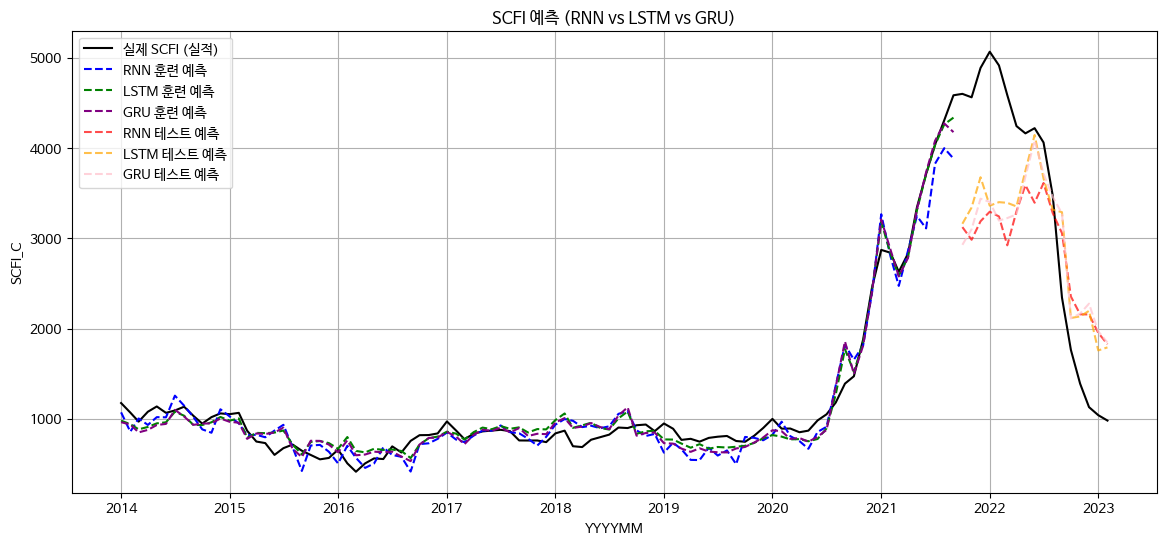

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time

# -------------------------------
#  1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# -------------------------------
file_path = "/content/sample_data/Ï†ÑÏ≤òÎ¶¨_SCFI.xlsx"

df = pd.read_excel(file_path)
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y-%m')

df['Month'] = df['YYYYMM'].dt.month
month_one_hot = pd.get_dummies(df['Month'], prefix='Month').iloc[:, 1:]

df_with_months = df.join(month_one_hot)
X = df_with_months.drop(['YYYYMM', 'SCFI_C', 'Month'], axis=1)
y = df_with_months['SCFI_C']

train_data = df[df['YYYYMM'] < '2021-10-01']
test_data = df[df['YYYYMM'] >= '2021-10-01']

X_train = X.iloc[:len(train_data)]
y_train = y.iloc[:len(train_data)]

X_test = X.iloc[len(train_data):]
y_test = y.iloc[len(train_data):]

# -------------------------------
#  2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (MinMax Scaling)
# -------------------------------
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train_scaled = X_scaled[:len(train_data)]
X_test_scaled = X_scaled[len(train_data):]

y_train_scaled = y_scaled[:len(train_data)]
y_test_scaled = y_scaled[len(train_data):]

X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# -------------------------------
#  3Ô∏è‚É£ Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò Ï†ïÏùò
# -------------------------------
def build_and_train_model(model_type):
    """ RNN, LSTM, GRU Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† ÏòàÏ∏°Í∞í Î∞òÌôò """
    model = Sequential()

    if model_type == "RNN":
        model.add(SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(SimpleRNN(30, activation='tanh'))
    elif model_type == "LSTM":
        model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(LSTM(30, activation='tanh'))
    elif model_type == "GRU":
        model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(GRU(30, activation='tanh'))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    start_time = time.time()
    model.fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=16, verbose=0)  # Ï∂úÎ†• ÏóÜÏù¥ ÌïôÏäµ
    training_time = time.time() - start_time

    return model, training_time

# -------------------------------
#  4Ô∏è‚É£ Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
# -------------------------------
models = {}
predictions = {}
training_times = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    start_time = time.time()

    # Î™®Îç∏ ÌïôÏäµ
    models[model_type], training_time = build_and_train_model(model_type)

    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_train_pred_scaled = models[model_type].predict(X_train_rnn)
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_test_pred_scaled = models[model_type].predict(X_test_rnn)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

    # Ïã§Ìñâ ÏãúÍ∞Ñ Ï†ÄÏû•
    execution_time = time.time() - start_time
    training_times[model_type] = [training_time, execution_time]

    predictions[model_type] = {"train": y_train_pred, "test": y_test_pred}

# -------------------------------
#  5Ô∏è‚É£ RMSE Í≥ÑÏÇ∞ Î∞è ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------
rmse_results = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions[model_type]["train"]))
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions[model_type]["test"]))
    rmse_results[model_type] = [rmse_train, rmse_test]

rmse_df = pd.DataFrame(rmse_results, index=["Train RMSE", "Test RMSE"])
print("\nüìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê")
print(rmse_df)

# -------------------------------
#  6Ô∏è‚É£ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE Í≥ÑÏÇ∞
# -------------------------------
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

total_predictions = {}
total_rmse_results = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    start_time = time.time()

    models[model_type].fit(X_rnn, y_scaled, epochs=100, batch_size=16, verbose=0)  # Ï∂úÎ†• ÏóÜÏù¥ ÌïôÏäµ
    training_time = time.time() - start_time

    y_total_pred_scaled = models[model_type].predict(X_rnn)
    y_total_pred = scaler_y.inverse_transform(y_total_pred_scaled)

    rmse_total = np.sqrt(mean_squared_error(y, y_total_pred))

    total_predictions[model_type] = y_total_pred
    total_rmse_results[model_type] = rmse_total
    training_times[model_type].append(training_time)

total_rmse_df = pd.DataFrame(total_rmse_results, index=["Total RMSE"])
print("\nüìå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE ÎπÑÍµê")
print(total_rmse_df)

# -------------------------------
#  7Ô∏è‚É£ Î™®Îç∏ ÏàòÌñâ ÏãúÍ∞Ñ ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------
execution_df = pd.DataFrame(training_times, index=["Train Time", "Total Execution Time", "Total Train Time"])
print("\nüìå Î™®Îç∏Î≥Ñ ÏàòÌñâ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)")
print(execution_df)

# -------------------------------
#  8Ô∏è‚É£ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# -------------------------------
plt.figure(figsize=(14,6))

plt.plot(df["YYYYMM"], y, label="Ïã§Ï†ú SCFI (Ïã§Ï†Å)", color='black', linestyle='solid')

for model_type, color in zip(["RNN", "LSTM", "GRU"], ["blue", "green", "purple"]):
    plt.plot(train_data["YYYYMM"], predictions[model_type]["train"], label=f"{model_type} ÌõàÎ†® ÏòàÏ∏°", color=color, linestyle='dashed')

for model_type, color in zip(["RNN", "LSTM", "GRU"],  ["red", "orange", "pink"]):
    plt.plot(test_data["YYYYMM"], predictions[model_type]["test"], label=f"{model_type} ÌÖåÏä§Ìä∏ ÏòàÏ∏°", color=color, linestyle='dashed', alpha=0.7)

plt.xlabel("YYYYMM")
plt.ylabel("SCFI_C")
plt.title("SCFI ÏòàÏ∏° (RNN vs LSTM vs GRU)")
plt.legend()
plt.grid()
plt.show()


# **Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÎ∂ÑÏÑùÌïòÍ≥† Í≥†ÎèÑÌôîÌïòÏûê**

# **Îû®Îç§ ÏãúÎìúÎ°ú ÎèôÏùº Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎèÑÎ°ù ÌïòÏûê**



# **Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌïôÏäµÏùÑ ÏãúÌÇ§Ïûê**

# (3Ï∞® Î™®Îç∏) ÎûúÎç§ÏãúÎìú Í≥†Ï†ïÍ≥º ÌïúÍ∏Ä Ï£ºÏÑùÏ≤òÎ¶¨(ÌäúÎãù Ï†Ñ)
- ÎèÑÌëú 17-11. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ï†Ñ 3Í∞ú Î™®Îç∏Ïùò 3Ï∞® ÏòàÏ∏° Í≤∞Í≥º ÎπÑÍµê(3Ï∞® Î™®Îç∏)
- ÎèÑÌëú 17-15. ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï Ìï®Ïàò
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ï†Ñ

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 128ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 177ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 201ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step

üìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê
                    RNN        LSTM          GRU
Train RMSE   179.109181  125.428726   130.463826
Test RMSE   1173.998301  969.291549  1044.004867

üìå Î™®Îç∏Î≥Ñ ÏàòÌñâ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)
                            RNN       LSTM        GRU
Train Time            11.242463  12.437627  12.791496
Total Execution Time  12.028436  13.971481  14.257520


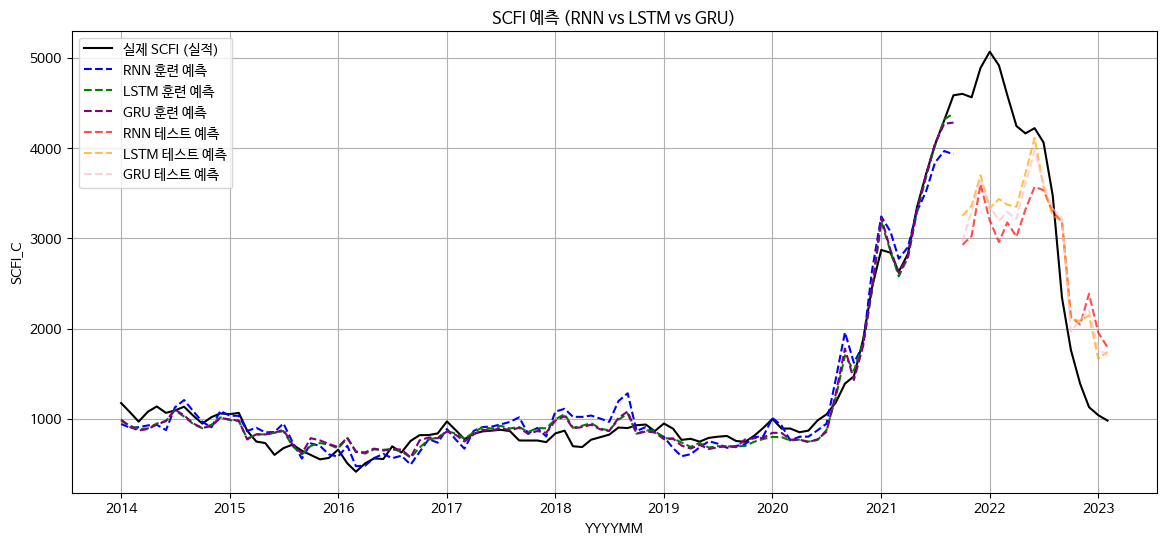

In [5]:
import pandas as pd  # Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è Î∂ÑÏÑùÏùÑ ÏúÑÌïú pandas ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np  # ÏàòÏπò Í≥ÑÏÇ∞ Î∞è Î∞∞Ïó¥ Ï≤òÎ¶¨Î•º ÏúÑÌïú NumPy ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt  # Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú matplotlib ÎùºÏù¥Î∏åÎü¨Î¶¨
import tensorflow as tf  # Îî•Îü¨Îãù ÌîÑÎ†àÏûÑÏõåÌÅ¨ TensorFlow Î∂àÎü¨Ïò§Í∏∞

from tensorflow.keras.models import Sequential  # ÏàúÏ∞® Î™®Îç∏(Sequential) Íµ¨Ï°∞ Î∂àÎü¨Ïò§Í∏∞
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense  # ÏàúÌôòÏã†Í≤ΩÎßù(RNN), LSTM, GRU, ÏôÑÏ†ÑÏó∞Í≤∞(Dense) Ï∏µ Î∂àÎü¨Ïò§Í∏∞

from sklearn.preprocessing import MinMaxScaler  # Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôîÎ•º ÏúÑÌïú MinMaxScaler
from sklearn.metrics import mean_squared_error  # ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏúÑÌïú RMSE Í≥ÑÏÇ∞Ïö© MSE Ìï®Ïàò

import time  # ÏΩîÎìú Ïã§Ìñâ ÏãúÍ∞Ñ Ï∏°Ï†ïÏùÑ ÏúÑÌïú time Î™®Îìà


# -------------------------------
#  1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# -------------------------------

# ColabÏóê ÏóÖÎ°úÎìúÌïú ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
file_path = "/content/sample_data/Ï†ÑÏ≤òÎ¶¨_SCFI.xlsx"

# ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_excel(file_path)

# YYYYMMÏùÑ ÎÇ†Ïßú(datetime) ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y-%m')

# Ïõî(Month) Ïª¨Îüº ÏÉùÏÑ± ÌõÑ Ïõê-Ìï´ Ïù∏ÏΩîÎî© (1Ïõî Ï†úÏô∏)
df['Month'] = df['YYYYMM'].dt.month
month_one_hot = pd.get_dummies(df['Month'], prefix='Month').iloc[:, 1:]

# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ìïú Ïõî Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
df_with_months = df.join(month_one_hot)

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y) Î∂ÑÎ¶¨
X = df_with_months.drop(['YYYYMM', 'SCFI_C', 'Month'], axis=1)  # Ï¢ÖÏÜçÎ≥ÄÏàò(SCFI_C) Ï†úÏô∏
y = df_with_months['SCFI_C']  # Ï¢ÖÏÜçÎ≥ÄÏàò

# ÌõàÎ†®(2021ÎÖÑ 10Ïõî Ïù¥Ï†Ñ) / ÌÖåÏä§Ìä∏(2021ÎÖÑ 10Ïõî Ïù¥ÌõÑ) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
train_data = df[df['YYYYMM'] < '2021-10-01']
test_data = df[df['YYYYMM'] >= '2021-10-01']

X_train = X.iloc[:len(train_data)]
y_train = y.iloc[:len(train_data)]

X_test = X.iloc[len(train_data):]
y_test = y.iloc[len(train_data):]

# -------------------------------
#  2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (MinMax Scaling)
# -------------------------------

# MinMaxScalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ X(ÎèÖÎ¶ΩÎ≥ÄÏàò)ÏôÄ y(Ï¢ÖÏÜçÎ≥ÄÏàò) Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÍ∑úÌôîÎêú Í∞íÏúºÎ°ú Î≥ÄÌôò
X_train_scaled = X_scaled[:len(train_data)]
X_test_scaled = X_scaled[len(train_data):]

y_train_scaled = y_scaled[:len(train_data)]
y_test_scaled = y_scaled[len(train_data):]

# RNN ÏûÖÎ†• ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ================================
#  üìå ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï Ìï®Ïàò (Ïû¨ÌòÑÏÑ± ÌôïÎ≥¥)
# ================================
import random  # ÌååÏù¥Ïç¨ ÎÇ¥Ïû• ÎûúÎç§ ÎùºÏù¥Î∏åÎü¨Î¶¨ (ÎÇúÏàò ÏÉùÏÑ±)
import os  # Ïö¥ÏòÅÏ≤¥Ï†ú(OS) Í¥ÄÎ†® Í∏∞Îä• Ï†úÍ≥µ

# ÎûúÎç§ ÏãúÎìúÎ•º Í≥†Ï†ïÌïòÎäî Ìï®Ïàò (Í∞ôÏùÄ Ïã§Ìóò Í≤∞Í≥ºÎ•º ÏñªÍ∏∞ ÏúÑÌï¥ ÏÑ§Ï†ï)
def set_random_seed(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)  # ÌååÏù¥Ïç¨Ïùò Ìï¥Ïãú Í∏∞Î∞ò ÎÇúÏàòÎ•º Í≥†Ï†ï (Ïû¨ÌòÑÏÑ± Î≥¥Ïû•)
    random.seed(seed)  # ÌååÏù¥Ïç¨ ÎÇ¥Ïû• ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
    np.random.seed(seed)  # ÎÑòÌååÏù¥ ÎÇúÏàò ÏÉùÏÑ± ÏãúÎìú Í≥†Ï†ï
    tf.random.set_seed(seed)  # ÌÖêÏÑúÌîåÎ°úÏö∞ ÎÇúÏàò ÏÉùÏÑ± ÏãúÎìú Í≥†Ï†ï (Î™®Îç∏ ÌïôÏäµÏùò ÏùºÍ¥ÄÏÑ± Ïú†ÏßÄ)

# ÏúÑÏóêÏÑú Ï†ïÏùòÌïú ÏãúÎìú Í≥†Ï†ï Ìï®ÏàòÎ•º Ïã§ÌñâÌïòÏó¨ ÎûúÎç§ÏÑ± Ï†úÏñ¥
set_random_seed(42)


# -------------------------------
#  3Ô∏è‚É£ RNN, LSTM, GRU Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò Ï†ïÏùò
# -------------------------------

def build_and_train_model(model_type):
    """ RNN, LSTM, GRU Î™®Îç∏ÏùÑ Ï†ïÏùòÌïòÍ≥† ÌïôÏäµÌïòÎäî Ìï®Ïàò """

    # Sequential Î™®Îç∏ ÏÉùÏÑ±
    model = Sequential()

    # Î™®Îç∏ ÌÉÄÏûÖÏóê Îî∞Îùº Ï†ÅÏ†àÌïú ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï°∞ Ï∂îÍ∞Ä
    if model_type == "RNN":
        model.add(SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(SimpleRNN(30, activation='tanh'))
    elif model_type == "LSTM":
        model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(LSTM(30, activation='tanh'))
    elif model_type == "GRU":
        model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(GRU(30, activation='tanh'))

    # Ï∂úÎ†•Ï∏µ Ï∂îÍ∞Ä
    model.add(Dense(1))

    # Î™®Îç∏ Ïª¥ÌååÏùº (Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÇ¨Ïö©)
    model.compile(optimizer='adam', loss='mse')

    # Î™®Îç∏ ÌïôÏäµ ÏãúÍ∞Ñ Ï∏°Ï†ï ÏãúÏûë
    start_time = time.time()
    model.fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=16, verbose=0)  # verbose=0ÏúºÎ°ú Ï∂úÎ†• Ïà®ÍπÄ
    training_time = time.time() - start_time  # ÌïôÏäµ ÏãúÍ∞Ñ Ï∏°Ï†ï Ï¢ÖÎ£å

    return model, training_time  # Î™®Îç∏Í≥º ÌïôÏäµ ÏãúÍ∞Ñ Î∞òÌôò

# -------------------------------
#  4Ô∏è‚É£ Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
# -------------------------------

models = {}
predictions = {}
training_times = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    start_time = time.time()

    # Î™®Îç∏ ÌïôÏäµ Î∞è ÌïôÏäµ ÏãúÍ∞Ñ Ï†ÄÏû•
    models[model_type], training_time = build_and_train_model(model_type)

    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_train_pred_scaled = models[model_type].predict(X_train_rnn)
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    y_test_pred_scaled = models[model_type].predict(X_test_rnn)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

    # Ï†ÑÏ≤¥ Ïã§Ìñâ ÏãúÍ∞Ñ Ï∏°Ï†ï
    execution_time = time.time() - start_time
    training_times[model_type] = [training_time, execution_time]

    predictions[model_type] = {"train": y_train_pred, "test": y_test_pred}

# -------------------------------
#  5Ô∏è‚É£ Î™®Îç∏Î≥Ñ RMSE Í≥ÑÏÇ∞ Î∞è ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------

rmse_results = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions[model_type]["train"]))
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions[model_type]["test"]))
    rmse_results[model_type] = [rmse_train, rmse_test]

rmse_df = pd.DataFrame(rmse_results, index=["Train RMSE", "Test RMSE"])
print("\nüìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê")
print(rmse_df)

# -------------------------------
#  6Ô∏è‚É£ Î™®Îç∏ ÏàòÌñâ ÏãúÍ∞Ñ ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------

execution_df = pd.DataFrame(training_times, index=["Train Time", "Total Execution Time"])
print("\nüìå Î™®Îç∏Î≥Ñ ÏàòÌñâ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)")
print(execution_df)

# -------------------------------
#  7Ô∏è‚É£ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# -------------------------------

plt.figure(figsize=(14,6))

# Ïã§Ï†Å Îç∞Ïù¥ÌÑ∞ ÌîåÎ°Ø
plt.plot(df["YYYYMM"], y, label="Ïã§Ï†ú SCFI (Ïã§Ï†Å)", color='black', linestyle='solid')

# Î™®Îç∏Î≥Ñ ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ ÌîåÎ°Ø
for model_type, color in zip(["RNN", "LSTM", "GRU"], ["blue", "green", "purple"]):
    plt.plot(train_data["YYYYMM"], predictions[model_type]["train"], label=f"{model_type} ÌõàÎ†® ÏòàÏ∏°", color=color, linestyle='dashed')

for model_type, color in zip(["RNN", "LSTM", "GRU"], ["red", "orange", "pink"]):
    plt.plot(test_data["YYYYMM"], predictions[model_type]["test"], label=f"{model_type} ÌÖåÏä§Ìä∏ ÏòàÏ∏°", color=color, linestyle='dashed', alpha=0.7)

plt.xlabel("YYYYMM")
plt.ylabel("SCFI_C")
plt.title("SCFI ÏòàÏ∏° (RNN vs LSTM vs GRU)")
plt.legend()
plt.grid()
plt.show()


# **ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌïòÏûê**

# **(4Ï∞® Î™®Îç∏) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù**


In [6]:
!pip install keras-tuner -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


ÎèÑÌëú 17-22. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÌõÑ 3Í∞ú Î™®Îç∏Ïùò 4Ï∞® ÏòàÏ∏° Í≤∞Í≥º ÎπÑÍµê(4Ï∞® Î™®Îç∏)

In [7]:
# ================================
#  üìå SCFI ÏòàÏ∏°: RNN vs LSTM vs GRU ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# -------------------------------
#  1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# -------------------------------

file_path = "/content/sample_data/Ï†ÑÏ≤òÎ¶¨_SCFI.xlsx"

df = pd.read_excel(file_path)
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y-%m')

df['Month'] = df['YYYYMM'].dt.month
month_one_hot = pd.get_dummies(df['Month'], prefix='Month').iloc[:, 1:]

df_with_months = df.join(month_one_hot)
X = df_with_months.drop(['YYYYMM', 'SCFI_C', 'Month'], axis=1)
y = df_with_months['SCFI_C']

train_data = df[df['YYYYMM'] < '2021-10-01']
test_data = df[df['YYYYMM'] >= '2021-10-01']

X_train = X.iloc[:len(train_data)]
y_train = y.iloc[:len(train_data)]

X_test = X.iloc[len(train_data):]
y_test = y.iloc[len(train_data):]

# -------------------------------
#  2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (MinMax Scaling)
# -------------------------------

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train_scaled = X_scaled[:len(train_data)]
X_test_scaled = X_scaled[len(train_data):]

y_train_scaled = y_scaled[:len(train_data)]
y_test_scaled = y_scaled[len(train_data):]

X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# -------------------------------
#  3Ô∏è‚É£ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌïú Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
# -------------------------------

def build_model(hp, model_type):
    """ RNN, LSTM, GRU Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò """

    model = Sequential()

    # Ï≤´ Î≤àÏß∏ ÏàúÌôòÏ∏µ
    if model_type == "RNN":
        model.add(SimpleRNN(hp.Int('units_1', 30, 100, step=10), activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(SimpleRNN(hp.Int('units_2', 20, 80, step=10), activation='tanh'))
    elif model_type == "LSTM":
        model.add(LSTM(hp.Int('units_1', 30, 100, step=10), activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(LSTM(hp.Int('units_2', 20, 80, step=10), activation='tanh'))
    elif model_type == "GRU":
        model.add(GRU(hp.Int('units_1', 30, 100, step=10), activation='tanh', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
        model.add(GRU(hp.Int('units_2', 20, 80, step=10), activation='tanh'))

    # Dropout Ï∂îÍ∞Ä (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    model.add(Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))

    # Ï∂úÎ†•Ï∏µ
    model.add(Dense(1))

    # ÏòµÌã∞ÎßàÏù¥Ï†Ä ÌïôÏäµÎ•† Ï°∞Ï†ï
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])), loss='mse')

    return model

# -------------------------------
#  4Ô∏è‚É£ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ïã§Ìñâ
# -------------------------------

tuner_results = {}
best_models = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    tuner = kt.RandomSearch(
        lambda hp: build_model(hp, model_type),
        objective='val_loss',
        max_trials=5,
        executions_per_trial=1,
        directory='/content/sample_data/tuning_results',
        project_name=f'{model_type}_tuning'
    )

    tuner.search(X_train_rnn, y_train_scaled, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_models[model_type] = tuner.hypermodel.build(best_hps)

# -------------------------------
#  5Ô∏è‚É£ ÏµúÏ†Å Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
# -------------------------------

rmse_results = {}
execution_times = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    start_time = time.time()
    best_models[model_type].fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=16, verbose=0)
    training_time = time.time() - start_time

    # ÏòàÏ∏° ÏàòÌñâ
    y_train_pred = scaler_y.inverse_transform(best_models[model_type].predict(X_train_rnn))
    y_test_pred = scaler_y.inverse_transform(best_models[model_type].predict(X_test_rnn))

    # RMSE Í≥ÑÏÇ∞
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    rmse_results[model_type] = [rmse_train, rmse_test]
    execution_times[model_type] = training_time

# -------------------------------
#  6Ô∏è‚É£ Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------

rmse_df = pd.DataFrame(rmse_results, index=["Train RMSE", "Test RMSE"])
print("\nüìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê")
print(rmse_df)

execution_df = pd.DataFrame(execution_times, index=["Training Time"])
print("\nüìå Î™®Îç∏Î≥Ñ ÌïôÏäµ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)")
print(execution_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 253ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 154ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 251ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step

üìå Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê
                    RNN         LSTM          GRU
Train RMSE   275.661791   121.108453   172.449440
Test RMSE   1276.457281  1000.978017  1007.682714

üìå Î™®Îç∏Î≥Ñ ÌïôÏäµ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)
                     RNN       LSTM        GRU
Training Time  12.220569  13.294585  14.075229


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step


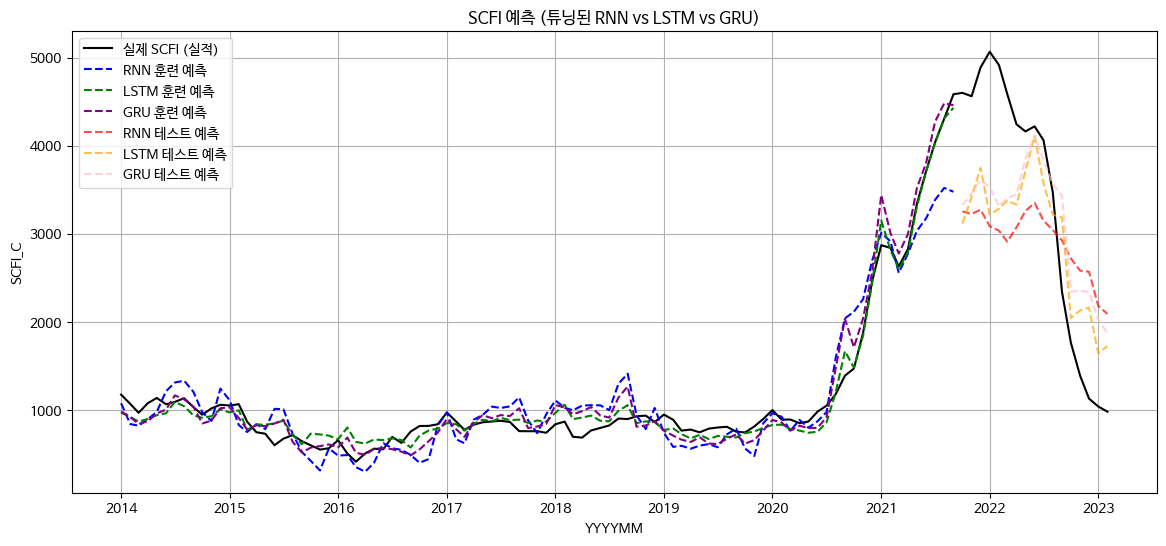

In [8]:
# -------------------------------
#  7Ô∏è‚É£ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÌõàÎ†® + ÌÖåÏä§Ìä∏ ÏòàÏ∏° Ï∂îÍ∞Ä)
# -------------------------------

plt.figure(figsize=(14,6))

# Ïã§Ï†Å Îç∞Ïù¥ÌÑ∞ (Í≤ÄÏùÄÏÉâ)
plt.plot(df["YYYYMM"], y, label="Ïã§Ï†ú SCFI (Ïã§Ï†Å)", color='black', linestyle='solid')

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (ÌååÎûÄÏÉâ)
for model_type, color in zip(["RNN", "LSTM", "GRU"], ["blue", "green", "purple"]):
    y_train_pred = scaler_y.inverse_transform(best_models[model_type].predict(X_train_rnn))
    plt.plot(train_data["YYYYMM"], y_train_pred, label=f"{model_type} ÌõàÎ†® ÏòàÏ∏°", color=color, linestyle='dashed')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Îπ®Í∞ÑÏÉâ)
for model_type, color in zip(["RNN", "LSTM", "GRU"], ["red", "orange", "pink"]):
    y_test_pred = scaler_y.inverse_transform(best_models[model_type].predict(X_test_rnn))
    plt.plot(test_data["YYYYMM"], y_test_pred, label=f"{model_type} ÌÖåÏä§Ìä∏ ÏòàÏ∏°", color=color, linestyle='dashed', alpha=0.7)

plt.xlabel("YYYYMM")
plt.ylabel("SCFI_C")
plt.title("SCFI ÏòàÏ∏° (ÌäúÎãùÎêú RNN vs LSTM vs GRU)")
plt.legend()
plt.grid()
plt.show()


# **ÏµúÏã† Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Î∞òÏòÅÌïòÎäî Î∞©ÏïàÏùÑ Í≥†ÎØºÌïòÏûê**

# **(5Ï∞® Î™®Îç∏) ÏµúÍ∑º Î≥ÄÎèôÏÑ±ÏùÑ Î∞òÏòÅÌïòÏó¨ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÌäúÎãù**

- ÎèÑÌëú 17-23. ÏµúÏã† Î≥ÄÎèôÏÑ±ÏùÑ Î∞òÏòÅÌïú Í∞ÄÏ§ëÏπò ÏÉùÏÑ±(5Ï∞® Î™®Îç∏)
- ÎèÑÌëú 17-24. ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞Ïóê Í∞ÄÏ§ëÏπòÎ•º ÏÑ§Ï†ïÌïòÏó¨ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Í≤∞Í≥º

Reloading Tuner from /content/sample_data/tuning_results/RNN_tuning/tuner0.json
Reloading Tuner from /content/sample_data/tuning_results/LSTM_tuning/tuner0.json
Reloading Tuner from /content/sample_data/tuning_results/GRU_tuning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 85ms/step
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 202ms/step
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 130ms/step

üìå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE ÎπÑÍµê
                   RNN        LSTM         GRU
Total RMSE  493.774532  240.176951  322.118366

üìå Î™®Îç∏Î≥Ñ ÌïôÏäµ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)
                     RNN       LSTM        GRU
Training Time  11.410102  12.807216  15.510392
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 


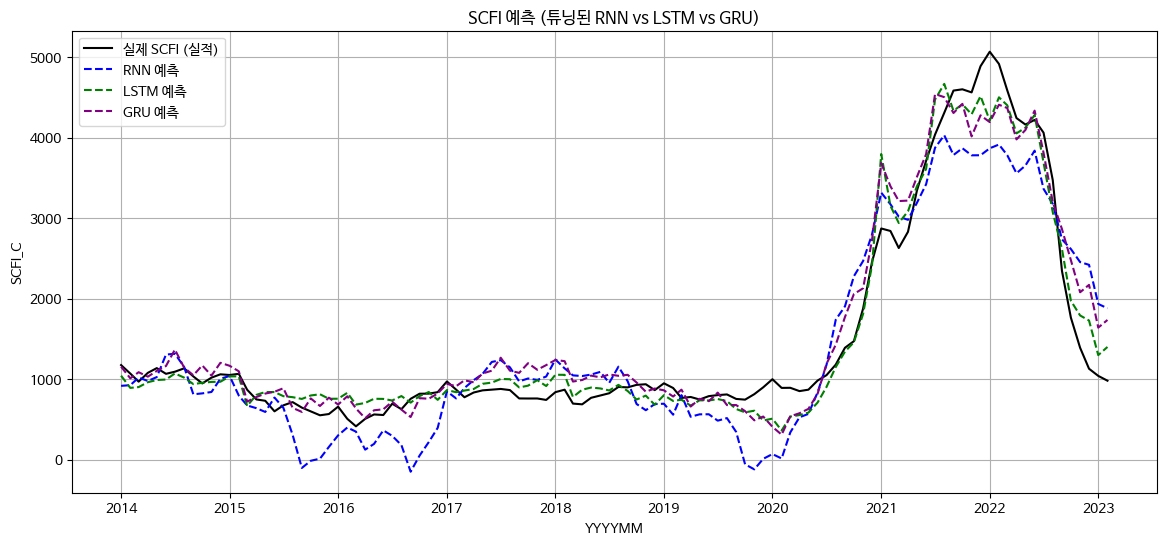

In [9]:
# ================================
#  üìå SCFI ÏòàÏ∏°: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÌäúÎãù & ÏµúÏã† Î≥ÄÎèôÏÑ± Î∞òÏòÅ
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# -------------------------------
#  1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# -------------------------------

file_path = "/content/sample_data/Ï†ÑÏ≤òÎ¶¨_SCFI.xlsx"

df = pd.read_excel(file_path)
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y-%m')

df['Month'] = df['YYYYMM'].dt.month
month_one_hot = pd.get_dummies(df['Month'], prefix='Month').iloc[:, 1:]

df_with_months = df.join(month_one_hot)
X = df_with_months.drop(['YYYYMM', 'SCFI_C', 'Month'], axis=1)
y = df_with_months['SCFI_C']

# -------------------------------
#  2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (MinMax Scaling)
# -------------------------------

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# -------------------------------
#  3Ô∏è‚É£ ÏµúÏã† Î≥ÄÎèôÏÑ±ÏùÑ Î∞òÏòÅÌïú Í∞ÄÏ§ëÏπò ÏÉùÏÑ±
# -------------------------------
# ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞ÏùºÏàòÎ°ù Îçî ÎÜíÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ (Ïòà: Í∞ÄÏû• ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞Ïóê 3Î∞∞ Í∞ÄÏ§ëÏπò)
time_weight = np.linspace(1, 3, len(y_scaled))  # 1ÏóêÏÑú 3ÍπåÏßÄ ÏÑ†Ìòï Ï¶ùÍ∞Ä
sample_weights = time_weight / time_weight.sum()  # Í∞ÄÏ§ëÏπò Ï†ïÍ∑úÌôî

# -------------------------------
#  4Ô∏è‚É£ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌïú Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
# -------------------------------

def build_model(hp, model_type):
    """ RNN, LSTM, GRU Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù) """
    model = Sequential()

    # Ï≤´ Î≤àÏß∏ ÏàúÌôòÏ∏µ
    if model_type == "RNN":
        model.add(SimpleRNN(hp.Int('units_1', 30, 100, step=10), activation='tanh', return_sequences=True, input_shape=(1, X_scaled.shape[1])))
        model.add(SimpleRNN(hp.Int('units_2', 20, 80, step=10), activation='tanh'))
    elif model_type == "LSTM":
        model.add(LSTM(hp.Int('units_1', 30, 100, step=10), activation='tanh', return_sequences=True, input_shape=(1, X_scaled.shape[1])))
        model.add(LSTM(hp.Int('units_2', 20, 80, step=10), activation='tanh'))
    elif model_type == "GRU":
        model.add(GRU(hp.Int('units_1', 30, 100, step=10), activation='tanh', return_sequences=True, input_shape=(1, X_scaled.shape[1])))
        model.add(GRU(hp.Int('units_2', 20, 80, step=10), activation='tanh'))

    # Dropout Ï∂îÍ∞Ä (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    model.add(Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))

    # Ï∂úÎ†•Ï∏µ
    model.add(Dense(1))

    # Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä ÌïôÏäµÎ•† ÌäúÎãù
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])), loss='mse')

    return model

# -------------------------------
#  5Ô∏è‚É£ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ïã§Ìñâ
# -------------------------------

tuner_results = {}
best_models = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    tuner = kt.RandomSearch(
        lambda hp: build_model(hp, model_type),
        objective='val_loss',  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò RMSE ÏµúÏÜåÌôî
        max_trials=5,
        executions_per_trial=1,
        directory='/content/sample_data/tuning_results',
        project_name=f'{model_type}_tuning'
    )

    tuner.search(X_rnn, y_scaled, sample_weight=sample_weights, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_models[model_type] = tuner.hypermodel.build(best_hps)

# -------------------------------
#  6Ô∏è‚É£ ÏµúÏ†Å Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
# -------------------------------

rmse_results = {}
execution_times = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    start_time = time.time()
    best_models[model_type].fit(X_rnn, y_scaled, sample_weight=sample_weights, epochs=100, batch_size=16, verbose=0)
    training_time = time.time() - start_time

    # ÏòàÏ∏° ÏàòÌñâ
    y_pred = scaler_y.inverse_transform(best_models[model_type].predict(X_rnn))

    # RMSE Í≥ÑÏÇ∞
    rmse_total = np.sqrt(mean_squared_error(y, y_pred))

    rmse_results[model_type] = rmse_total
    execution_times[model_type] = training_time

# -------------------------------
#  7Ô∏è‚É£ Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
# -------------------------------

rmse_df = pd.DataFrame(rmse_results, index=["Total RMSE"])
print("\nüìå Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ RMSE ÎπÑÍµê")
print(rmse_df)

execution_df = pd.DataFrame(execution_times, index=["Training Time"])
print("\nüìå Î™®Îç∏Î≥Ñ ÌïôÏäµ ÏãúÍ∞Ñ ÎπÑÍµê (Ï¥à)")
print(execution_df)

# -------------------------------
#  8Ô∏è‚É£ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# -------------------------------

plt.figure(figsize=(14,6))
plt.plot(df["YYYYMM"], y, label="Ïã§Ï†ú SCFI (Ïã§Ï†Å)", color='black', linestyle='solid')

for model_type, color in zip(["RNN", "LSTM", "GRU"], ["blue", "green", "purple"]):
    y_pred = scaler_y.inverse_transform(best_models[model_type].predict(X_rnn))
    plt.plot(df["YYYYMM"], y_pred, label=f"{model_type} ÏòàÏ∏°", color=color, linestyle='dashed')

plt.xlabel("YYYYMM")
plt.ylabel("SCFI_C")
plt.title("SCFI ÏòàÏ∏° (ÌäúÎãùÎêú RNN vs LSTM vs GRU)")
plt.legend()
plt.grid()
plt.show()
